In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
raw_data = pd.read_csv("train.csv")
data = raw_data.copy()
LEN = len(data)

In [69]:
data.drop(["PassengerId", "Name","Cabin","Ticket"],axis=1,inplace=True)
age_median = data["Age"].median()
data["Age"] = data["Age"].fillna(age_median)
data["Embarked"] = data["Embarked"].fillna("S")



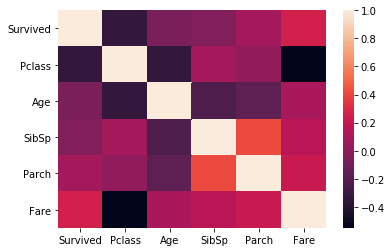

In [80]:
sns.heatmap(data.corr())
plt.show()

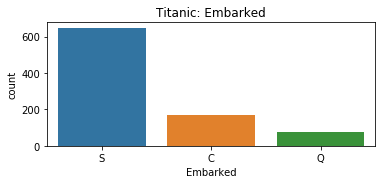

In [72]:
plt.figure(num=1,figsize=(20,5))
plt.subplot(231)
sns.countplot(data["Embarked"])
plt.title("Titanic: Embarked")
plt.subplot(232)
plt.show()


In [41]:
data = pd.get_dummies(data,drop_first=True)

train = data.iloc[:int(LEN*0.8),]

test = data.iloc[int(LEN*0.8):,]
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
707,1,1,42.0,0,0,26.2875,1,0,1
708,1,1,22.0,0,0,151.5500,0,0,1
709,1,3,28.0,1,1,15.2458,1,0,0
710,1,1,24.0,0,0,49.5042,0,0,0


In [47]:
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit


y_train = train["Survived"]
x_train = train.drop(["Survived"],axis=1)
y_test = test["Survived"].to_numpy()
x_test = test.drop(["Survived"],axis=1).to_numpy()

In [58]:
model = Logit(y_train,x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.504561
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Tue, 14 Apr 2020   Pseudo R-squ.:                  0.2457
Time:                        07:47:52   Log-Likelihood:                -359.25
converged:                       True   LL-Null:                       -476.29
Covariance Type:            nonrobust   LLR p-value:                 6.714e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0011      0.095      0.012      0.991      -0.186       0.188
Age            0.0094      0.

In [65]:
#model = LogisticRegression(max_iter=1000).fit(x_train,y_train)
predictions = [1 if (i > 0.5) else 0 for i in model.predict(x_test)]
score = sum(predictions == y_test)/len(y_test)
print(score)

0.8268156424581006


In [16]:
model.score(x_test,y_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [95]:
final_data = pd.read_csv("test.csv")
#final_data.isna().sum()
pass_id = final_data["PassengerId"]
final_data.drop(["PassengerId", "Name","Cabin","Ticket"],axis=1,inplace=True)
final_data["Age"].fillna(final_data["Age"].median(),inplace=True)
final_data["Fare"].fillna(final_data["Fare"].mean(),inplace=True)
final_data["Embarked"].fillna("S",inplace=True)
final_data.dropna(inplace=True)
final_data = pd.get_dummies(final_data,drop_first=True)
final_submission = pd.DataFrame(data={"PassengerId":pass_id,"Survived":model.predict(final_data.to_numpy()).reshape(418)})
print(final_submission.head())
#final_submission.to_csv(path_or_buf="submission_01.csv",index=False)

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


'0'